In [ ]:
from pyannote.core import Annotation, Timeline, Segment, notebook
notebook.reset()
from pyannote.metrics.diarization import DiarizationPurity, DiarizationCoverage

In [ ]:
purity = DiarizationPurity()
coverage = DiarizationCoverage()

In [ ]:
reference = Annotation()
reference[Segment(0, 10)] = 'A'
reference[Segment(5, 15)] = 'B'

In [ ]:
hypothesis = Annotation()
hypothesis[Segment(0, 10)] = 'A'
hypothesis[Segment(5, 15)] = 'B'

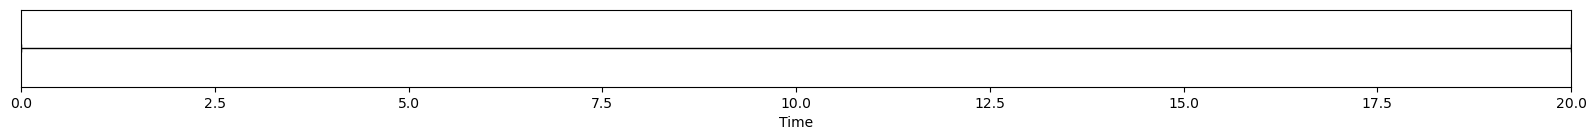

In [ ]:
uem = Timeline()
uem.add(Segment(0, 20))

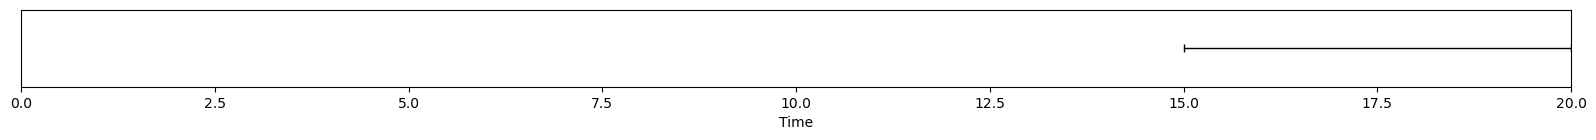

In [ ]:
reference.get_timeline().gaps(support=uem)

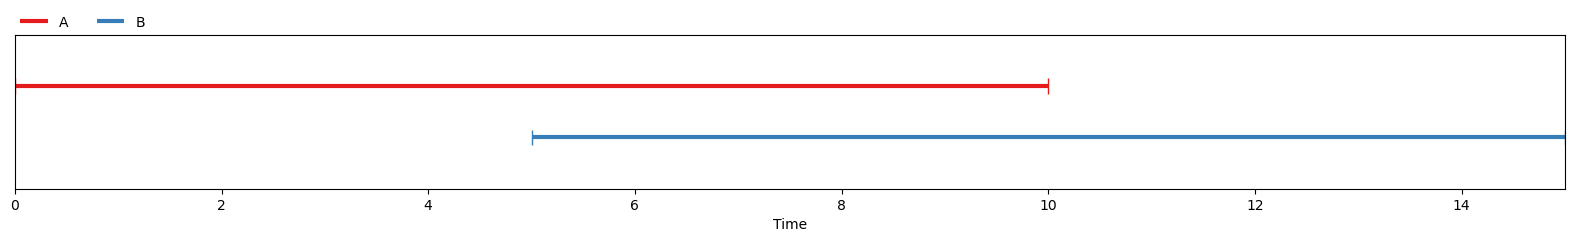

In [ ]:
hypothesis

In [ ]:
purity(reference, hypothesis)

/Users/hbredin/miniconda3/envs/pyannote-mps/lib/python3.9/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


0.6666666666666666

In [ ]:
sorted(hypothesis.crop(reference.label_timeline('A')).chart(), key=lambda x: x[1])[-1][1] / reference.label_timeline('A').duration()

1.0

In [ ]:
def compute_purity(reference, hypothesis):
    
    labels = hypothesis.labels()
    total_label_duration = 0
    total_purity_duration = 0
    for label in labels:
        label_timeline = hypothesis.label_timeline(label)
        label_duration = label_timeline.duration()
        total_label_duration += label_duration
        chart = reference.crop(label_timeline).chart()
        if chart:
            purity_duration = chart[0][1]
        else:
            purity_duration = 0
        print(label, label_duration, purity_duration)
        total_purity_duration += purity_duration
    
    return total_label_duration, total_purity_duration, total_purity_duration / total_label_duration

In [ ]:
compute_purity(reference, hypothesis)

A 7.5 7.5
B 7.5 7.5
C 1 0


(16.0, 15.0, 0.9375)

In [ ]:
hypothesis = Annotation()
hypothesis[Segment(0, 7.5)] = 'A'
hypothesis[Segment(7.5, 15)] = 'B'
hypothesis[Segment(16, 17)] = 'C'

compute_purity(reference, hypothesis)

(16.0, 5.0, 0.3125)

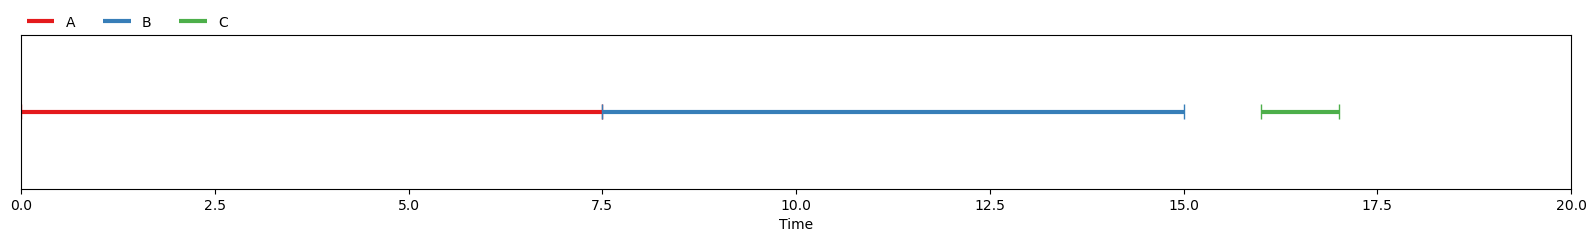

In [ ]:
hypothesis

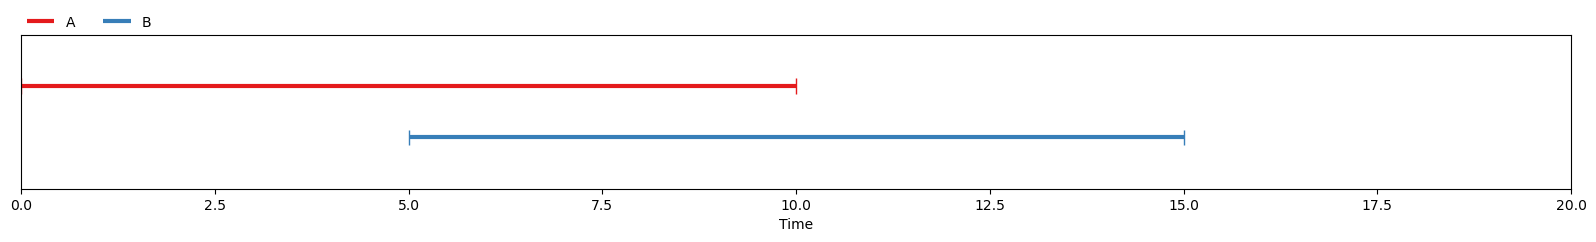

In [ ]:
reference

In [ ]:
reference = Annotation()
reference[Segment(0, 10), '1'] = 'A'
reference[Segment(0, 10), '2'] = 'B'

In [ ]:
hypothesis = Annotation()
hypothesis[Segment(0, 10)] = 'A'

In [ ]:
compute_purity(reference, hypothesis)

A 10 10


(10, 10, 1.0)

In [ ]:
compute_purity(hypothesis, reference)

A 10 10
B 10 10


(20, 20, 1.0)

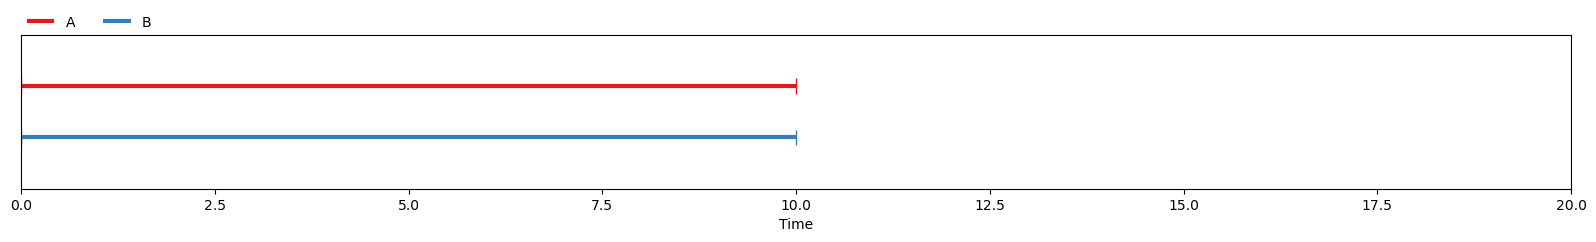

In [ ]:
reference

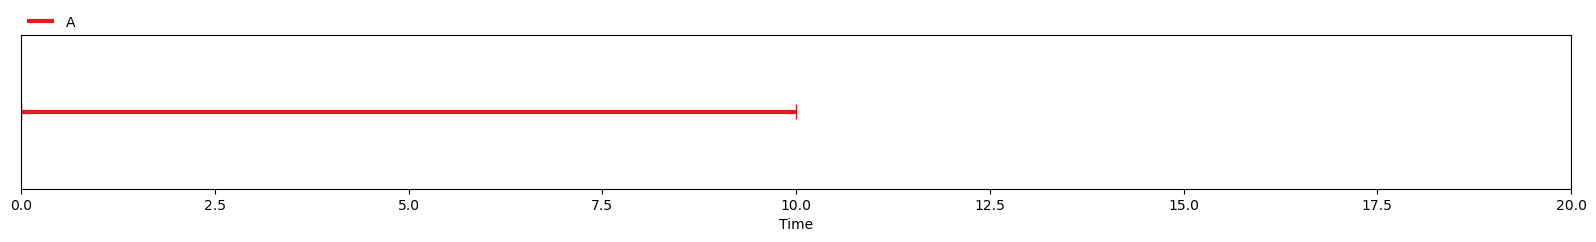

In [ ]:
hypothesis